# Import CSV and Preprocess Reaction Times

I'll begin by importing data from the CSV file, and then preprocessing some of the data.

In [9]:
import pandas as pd

df = pd.read_csv('Tuning In to Tempo.csv')

# Remove timestamps
df = df.drop(columns='Timestamp')

# Note that some of the values for these times are invalid/unusual for reaction times
#df[['Time #1 (in ms)', 'Time #2 (in ms)','Time #3 (in ms)']]

It's evident that the 21st row has falsified data, so I'll be removing the entire row. The 14th row also has an extremely large reaction time, so I'll be replacing it with the average of the other two values.

In [11]:
# df = df.drop(labels=21, axis=0)
# df.at[14,'Time #1 (in ms)'] = int((df.at[14,'Time #2 (in ms)'] + df.at[14,'Time #3 (in ms)']) / 2)

# df

I can now compute the average reaction times, and organize the data.

In [12]:
# Convert discrete labels to numerical values
df['Gender'] = df['Gender'].apply(lambda x: 0 if x == "Man" else (1 if x == "Woman" else 2))

# Compute the average for the base time
df['Avg Base Time (ms)'] = df[['Time #1 (in ms)', 'Time #2 (in ms)','Time #3 (in ms)']].mean(axis=1).round(0)

for i in range(1, 5):
    # Compute the average for the reaction times for each song
    df[f'Avg Reaction Time #{i} (ms)'] = df[[f'Time #1 (in ms).{i}', f'Time #2 (in ms).{i}',f'Time #3 (in ms).{i}']].mean(axis=1).round(0)
    # Convert the discrete labels for having heard the song before to binary values
    if i == 1: 
        df[f'Heard Before Song #{i}'] = df[f'Have you heard of this song before?'].apply(lambda x: 0 if x == "No" else 1)
    else:
        df[f'Heard Before Song #{i}'] = df[f'Have you heard of this song before?.{i-1}'].apply(lambda x: 0 if x == "No" else 1)

# Remove the old columns
df.drop(df.iloc[:, 4:-9], axis=1, inplace=True)

# df

In [14]:
alternate_df = df.copy(deep=True)

# Add columns for the deviation of the reaction times from the base time
for i in range(1, 5):
    alternate_df[f'Reaction Time Deviation #{i}'] = alternate_df.apply(lambda row: row[f'Avg Reaction Time #{i} (ms)'] - row['Avg Base Time (ms)'], axis=1)
    
alternate_df

,Age,Mood,Energy,Gender,Avg Base Time (ms),Avg Reaction Time #1 (ms),Heard Before Song #1,Avg Reaction Time #2 (ms),Heard Before Song #2,Avg Reaction Time #3 (ms),Heard Before Song #3,Avg Reaction Time #4 (ms),Heard Before Song #4,Reaction Time Deviation #1,Reaction Time Deviation #2,Reaction Time Deviation #3,Reaction Time Deviation #4
0,20,4,4,0,313.0,346.0,1,333.0,0,393.0,0,311.0,0,33.0,20.0,80.0,-2.0
1,20,3,2,1,352.0,354.0,1,391.0,0,381.0,0,356.0,0,2.0,39.0,29.0,4.0
2,19,3,2,0,359.0,280.0,1,303.0,0,262.0,0,326.0,0,-79.0,-56.0,-97.0,-33.0
3,22,3,4,1,296.0,266.0,1,227.0,0,275.0,0,286.0,0,-30.0,-69.0,-21.0,-10.0
4,25,2,2,1,270.0,274.0,1,283.0,0,255.0,0,313.0,0,4.0,13.0,-15.0,43.0
5,23,2,3,1,196.0,265.0,1,212.0,0,234.0,1,264.0,0,69.0,16.0,38.0,68.0
6,23,4,3,0,260.0,268.0,1,247.0,0,242.0,0,249.0,1,8.0,-13.0,-18.0,-11.0
7,20,4,3,1,293.0,284.0,1,294.0,0,305.0,0,268.0,0,-9.0,1.0,12.0,-25.0
8,19,2,1,1,331.0,299.0,1,278.0,0,268.0,0,326.0,1,-32.0,-53.0,-63.0,-5.0
9,18,3,2,1,271.0,269.0,1,272.0,0,261.0,0,274.0,0,-2.0,1.0,-10.0,3.0


# Reaction Times Exploratory Data Analysis

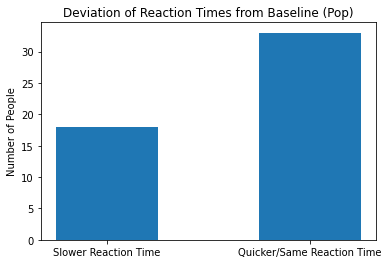

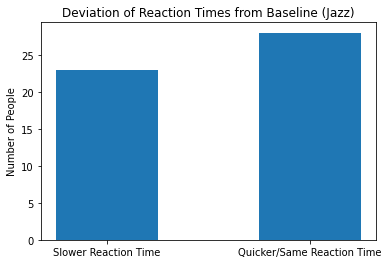

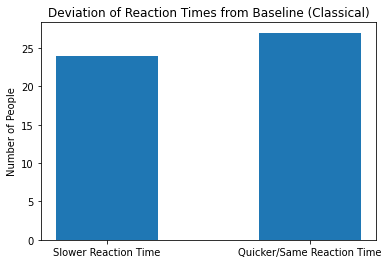

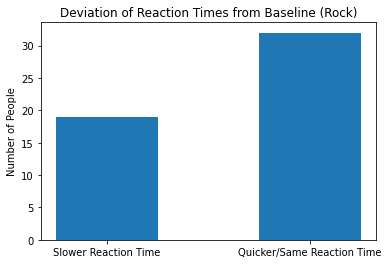

In [23]:
import matplotlib.pyplot as plt

# Pop, Jazz, Classical, Rock (in that order)
num_data = len(alternate_df.index)
num_pop_slower_reaction = len(alternate_df[alternate_df['Reaction Time Deviation #1'] > 0])
num_jazz_slower_reaction = len(alternate_df[alternate_df['Reaction Time Deviation #2'] > 0])
num_classical_slower_reaction = len(alternate_df[alternate_df['Reaction Time Deviation #3'] > 0])
num_rock_slower_reaction = len(alternate_df[alternate_df['Reaction Time Deviation #4'] > 0])

song_genre = ["Pop", "Jazz", "Classical", "Rock"]
slower_reaction = [num_pop_slower_reaction, num_jazz_slower_reaction, num_classical_slower_reaction, num_rock_slower_reaction]
quicker_reaction = [num_data - slower_reaction[i] for i in range(len(slower_reaction))]

for i in range(4):
    plt.bar(['Slower Reaction Time', 'Quicker/Same Reaction Time'], [slower_reaction[i], quicker_reaction[i]], width=0.5)

    plt.title(f'Deviation of Reaction Times from Baseline ({song_genre[i]})')
    plt.ylabel('Number of People')
    plt.show()

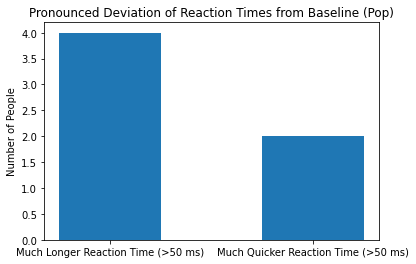

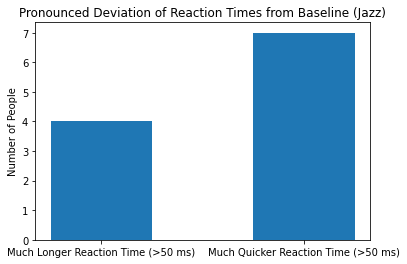

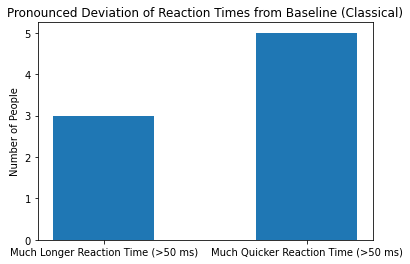

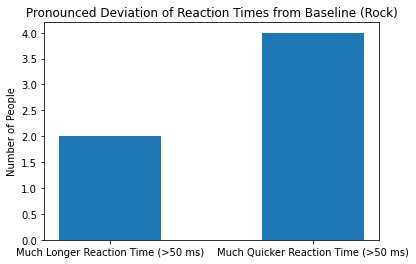

In [28]:
num_pop_much_slower_reaction = len(alternate_df[alternate_df['Reaction Time Deviation #1'] > 50])
num_jazz_much_slower_reaction = len(alternate_df[alternate_df['Reaction Time Deviation #2'] > 50])
num_classical_much_slower_reaction = len(alternate_df[alternate_df['Reaction Time Deviation #3'] > 50])
num_rock_much_slower_reaction = len(alternate_df[alternate_df['Reaction Time Deviation #4'] > 50])

num_pop_much_quicker_reaction = len(alternate_df[alternate_df['Reaction Time Deviation #1'] < -50])
num_jazz_much_quicker_reaction = len(alternate_df[alternate_df['Reaction Time Deviation #2'] < -50])
num_classical_quicker_longer_reaction = len(alternate_df[alternate_df['Reaction Time Deviation #3'] < -50])
num_rock_much_quicker_reaction = len(alternate_df[alternate_df['Reaction Time Deviation #4'] < -50])

much_slower_reaction = [num_pop_much_slower_reaction, num_jazz_much_slower_reaction, num_classical_much_slower_reaction, num_rock_much_slower_reaction]
much_quicker_reaction = [num_pop_much_quicker_reaction, num_jazz_much_quicker_reaction, num_classical_quicker_longer_reaction, num_rock_much_quicker_reaction]

for i in range(4):
    plt.bar(['Much Longer Reaction Time (>50 ms)', 'Much Quicker Reaction Time (>50 ms)'], [much_slower_reaction[i], much_quicker_reaction[i]], width=0.5)

    plt.title(f'Pronounced Deviation of Reaction Times from Baseline ({song_genre[i]})')
    plt.ylabel('Number of People')
    plt.show()

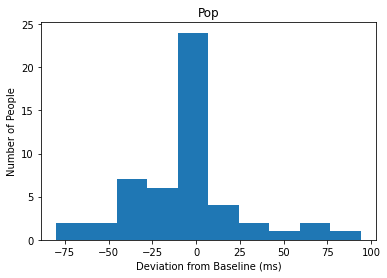

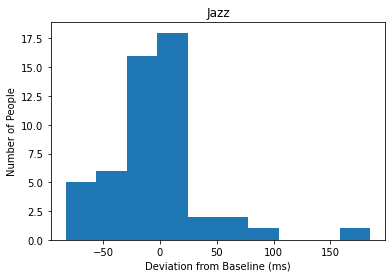

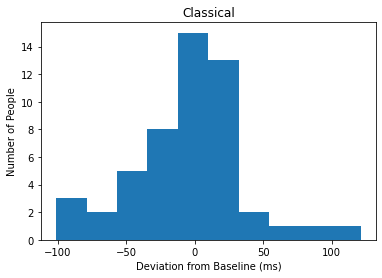

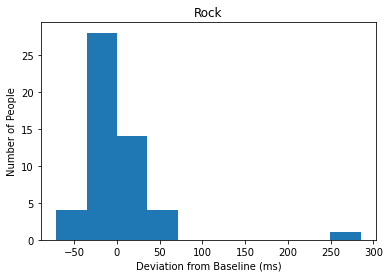

In [40]:
import numpy as np

pop_deviations = alternate_df['Reaction Time Deviation #1'].to_numpy()
jazz_deviations = alternate_df['Reaction Time Deviation #2'].to_numpy()
classical_deviations = alternate_df['Reaction Time Deviation #3'].to_numpy()
rock_deviations = alternate_df['Reaction Time Deviation #4'].to_numpy()

histogram_selections = [pop_deviations, jazz_deviations, classical_deviations, rock_deviations]

for i in range(4):
    plt.hist(histogram_selections[i])
    plt.title(f'{song_genre[i]}')
    plt.xlabel('Deviation from Baseline (ms)')
    plt.ylabel('Number of People')
    plt.show() 

# Audio Samples Exploratory Data Analysis

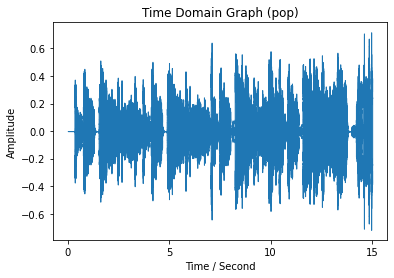

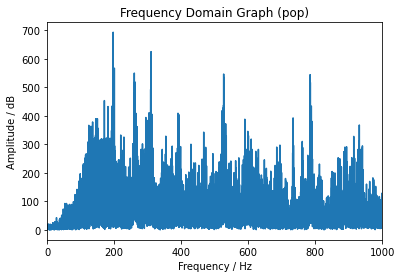

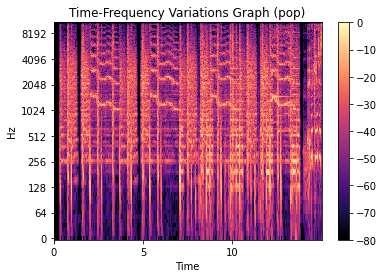

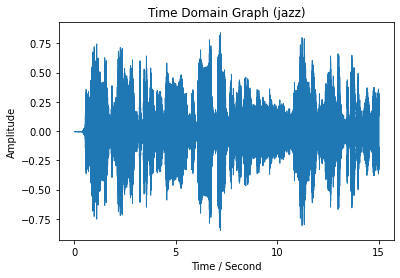

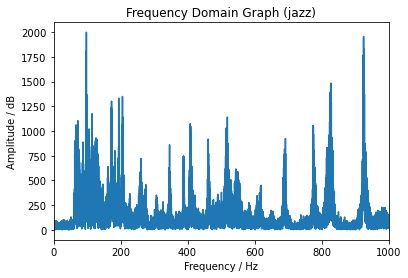

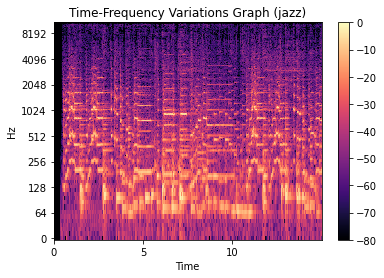

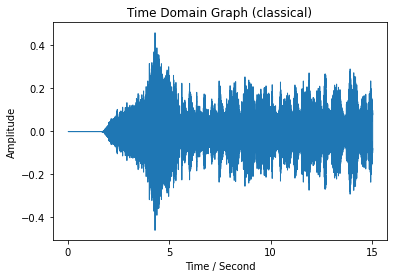

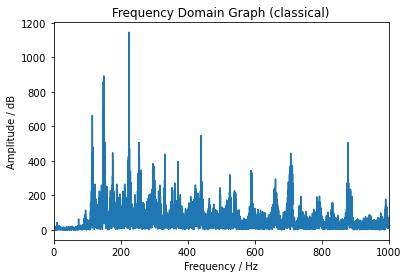

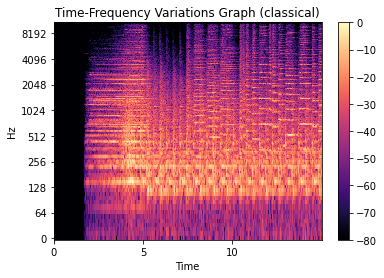

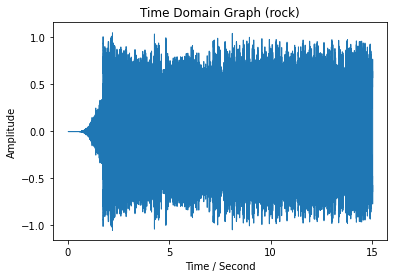

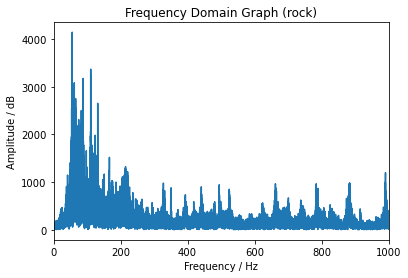

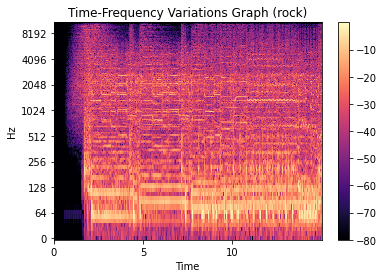

In [43]:
import librosa

paths = {"pop": "Snippets/Britney Spears - Toxic (Lyrics).wav", 
         "jazz": "Snippets/Wynton Kelly Sextet - Keep It Moving.wav",
         "classical": "Snippets/Shostakovich Symphony No. 5 Orozco-Estrada · Berliner Philharmoniker-AuLMeEqbk_s-256k-1655635652470.wav",
         "rock": "Snippets/STAND PROUD - Jin Hashimoto.wav"
        }

for genre, path in paths.items():     
    signal, sample_rate = librosa.load(path)
    
    # Plot each of the audios in the time domain
    plt.figure(1)
    librosa.display.waveshow(y=signal, sr=sample_rate)
    plt.xlabel('Time / Second')
    plt.ylabel('Amplitude')
    plt.title(f'Time Domain Graph ({genre})')
    plt.show()
    
    # Plot each of the audios in the frequency domain
    k = np.arange(len(signal))
    T = len(signal)/sample_rate
    freq = k/T
    DATA_0 = np.fft.fft(signal)
    abs_DATA_0 = abs(DATA_0)
    plt.figure(2)
    plt.plot(freq, abs_DATA_0)
    plt.xlabel("Frequency / Hz")
    plt.ylabel("Amplitude / dB")
    plt.xlim([0, 1000])
    plt.title(f'Frequency Domain Graph ({genre})')
    plt.show()
    
    # Plot each of the audios with their time-frequency variations
    D = librosa.stft(signal) 
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    plt.figure(3)
    librosa.display.specshow(S_db, x_axis='time', y_axis='log')
    plt.colorbar()
    plt.title(f'Time-Frequency Variations Graph ({genre})')
    plt.show()

# Audio Samples Acoustic Feature Extractions & Preprocessing

In [136]:
import math

# Define a function that extracts acoustic features and processes them after deriving the signal and sample rate from an audio
def audio_feature_extraction(signal, sample_rate):
    num_partitions = 15 # Choose how many equally spaced samples to use for deriving the acoustic features from the sound
    # 15 was chosen arbitrarily partly as there are 15 seconds in the snippet, but primarily as I know we'd have to take partitions of the snippets
    # to not overcrowd the models with excessive computations and overshadow other features
    
    # Create a list to store all the acoustic features after processing
    audio_features_lst = []
    
    # Gather the tempo feature, which represents the tempo of the song snippet
    tempo, beat_frames = librosa.beat.beat_track(y=signal, sr=sample_rate)
    
    # Gather the spectral centroid feature from the song snippet, which can be used to represent the "brightness" of a sound
    brightness = librosa.feature.spectral_centroid(y=signal, sr=sample_rate)
    # Process the brightness features, to allow for 15 samples for a representation of the holistic brightness for the sound
    processed_brightness = [brightness[0][i] for i in range(0, len(brightness[0]), math.floor(len(brightness[0])/num_partitions)) if i < (math.floor(len(brightness[0])/num_partitions) * num_partitions)]
    
    # Gather the octave-based spectral contrast from the song snippet, which relates the harmonic and noise components of a piece
    contrast = librosa.feature.spectral_contrast(y=signal,sr=sample_rate)
    # Process each of the 7 bands by taking their averages and storing them in a list
    avg_contrast_band = [np.mean(band) for band in contrast]
    
    # Gather the mel-frequency cepstral coefficients for 12 bands, which describes the "timbre" feel of the piece
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    # Process each of the 12 bands by taking their averages and storing them in a list
    avg_mfccs_band = [np.mean(band) for band in mfccs]
    
    # Gather the zero crossing rate features, which can be used to ascertain the "percussive" sounds of a piece
    zcr = librosa.feature.zero_crossing_rate(y=signal)
    # Process the zero crossing rate features, to allow for 15 samples for a representation of the holistic percussive feel for the sound
    processed_zcr = [zcr[0][i] for i in range(0, len(zcr[0]), math.floor(len(zcr[0])/num_partitions)) if i < (math.floor(len(zcr[0])/num_partitions) * num_partitions)]
    
    # Gather the chroma features, which can reflect the semitones of the musical octave for the piece
    chromagram = librosa.feature.chroma_stft(y=signal, sr=sample_rate)
    # Process each of the given bands by taking their averages and storing them in a list
    avg_chromagram_band = [np.mean(band) for band in chromagram]

    # Gather the mel spectrogram features, which reflect the spectrogram features but in a capacity for human ears
    mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
    # Process each of 12 bands by taking their averages and storing them in a list
    avg_mel_spectrogram_band = [np.mean(band) for band in mel_spectrogram]
    
    # Combine all of the features to the list to be returned
    audio_features_lst.append(tempo)
    audio_features_lst.extend(processed_brightness)
    audio_features_lst.extend(avg_contrast_band)
    audio_features_lst.extend(avg_mfccs_band)
    audio_features_lst.extend(processed_zcr)
    audio_features_lst.extend(avg_chromagram_band)
    audio_features_lst.extend(avg_mel_spectrogram_band)
    
    return audio_features_lst

# Combine Features and Model Development